**Dataset Name:** House Price Prediction Dataset

https://drive.google.com/file/d/1aNw7f2sO16PlhqxdOeFBqwWDjjE1XrhT/view?usp=sharing

**Business Scenario**
A real estate analytics company helps customers estimate the **market value of residential properties**.

Property prices do not always increase smoothly:
- Prices jump based on location
- Amenities create sudden price differences
- Market behaviour is noisy and inconsistent

The company wants a **reliable pricing system** that can:
- Handle non-linear relationships
- Works well with noisy real-world data
- Provide stable predictions for unseen properties

You are hired as a **Data Analyst** to build this pricing solution.
1. Load the dataset and examine the available property attributes.
2. Identify input features that may influence house prices (e.g., size, bedrooms, bathrooms, location-related fields).
3. Build a regression model that predicts house price based on the selected features.
4. Train the model using historical property data.Predict prices for unseen property records.
5. Evaluate the model performance using:
    - Mean Squared Error (MSE)
    - R² score

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading Dataset

In [57]:
path = '../Data_Source/house_data.csv'
df = pd.read_csv(path)

# Data Inspection

In [58]:
df.shape

(4600, 18)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [60]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

# Data Clearning

## Outlier Detection

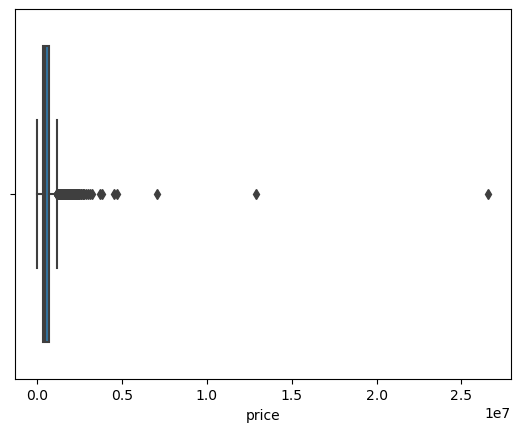

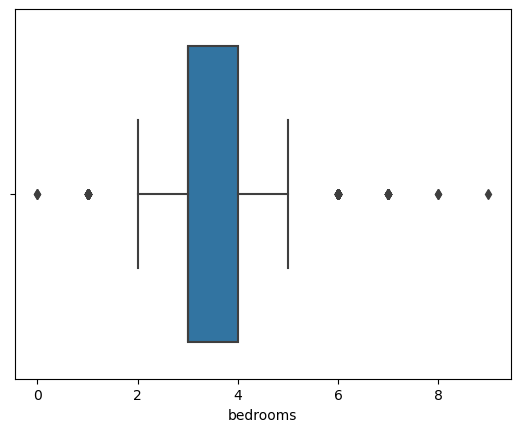

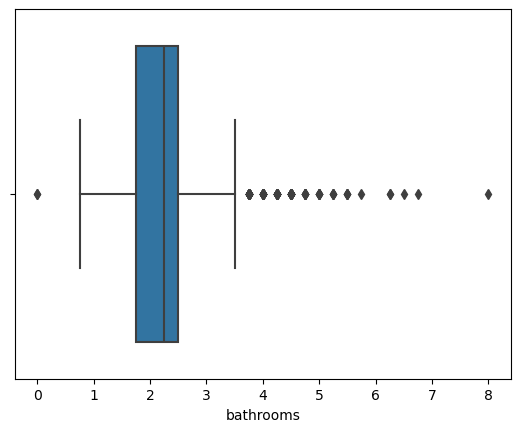

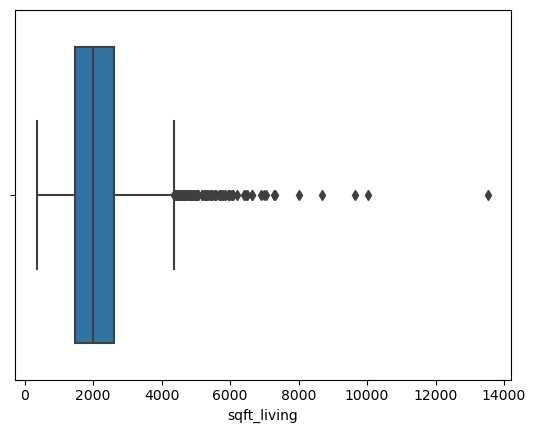

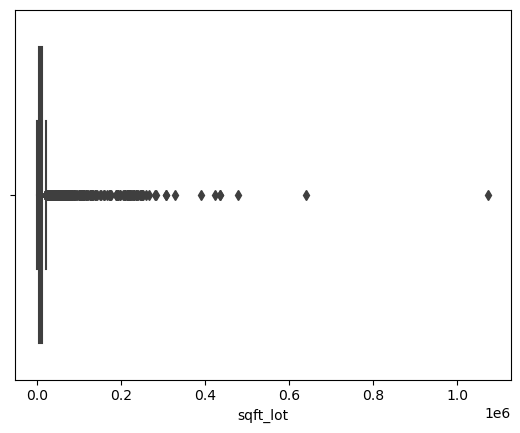

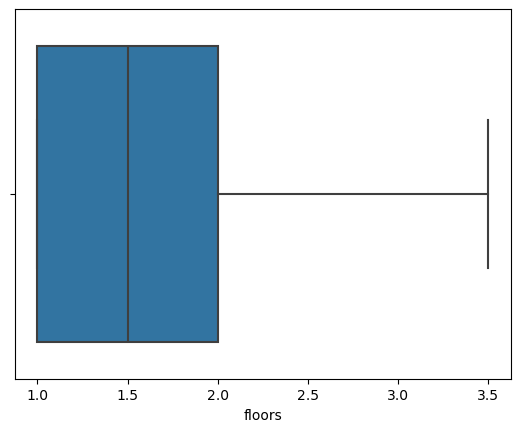

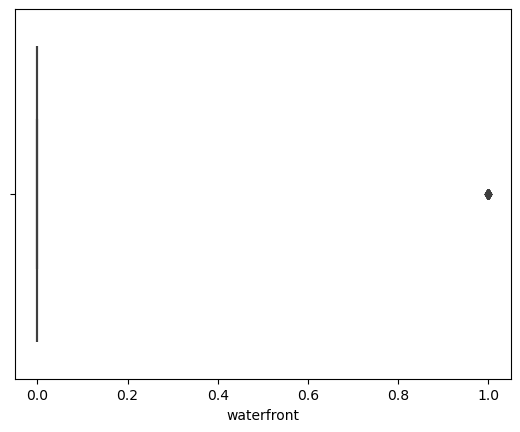

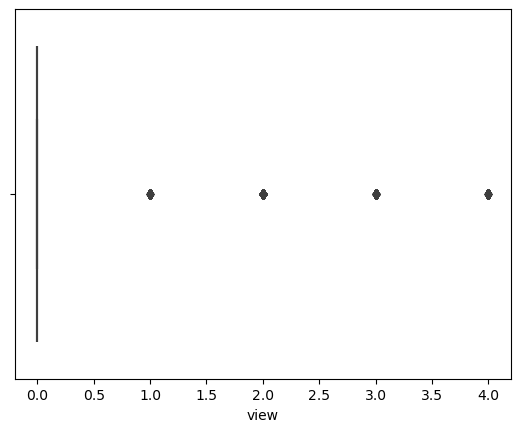

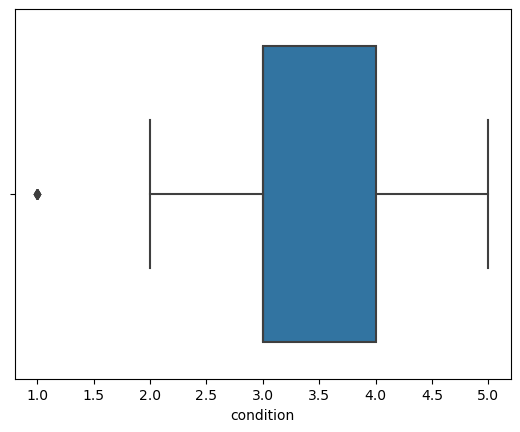

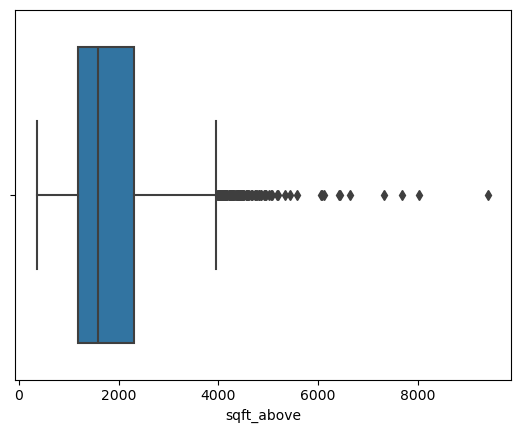

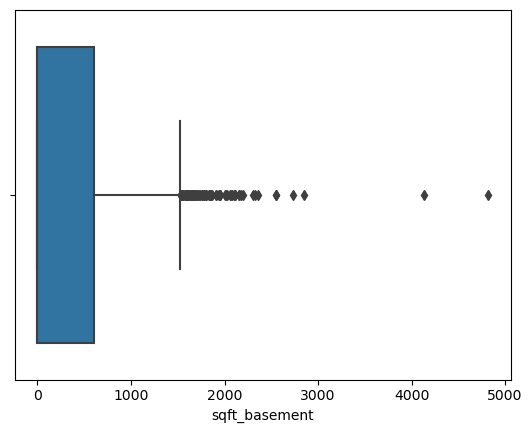

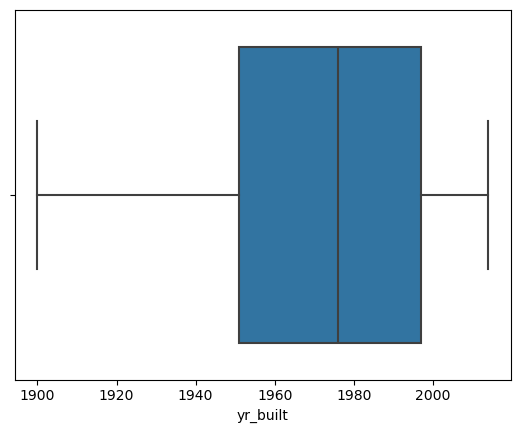

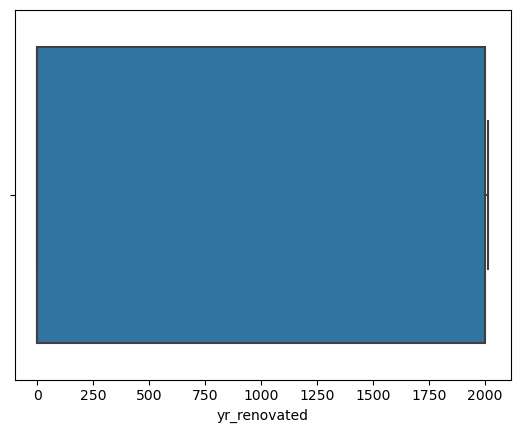

In [61]:
for feature in df.columns:
    if df[feature].dtype in ['float64', 'int64']:
        sns.boxplot(data=df, x=feature)
        plt.show()

In [62]:
numeric_cols = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
    'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'
]

outlier_percentages = {}
original_shape = df.shape[0]

for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        percentage = (outliers_count / original_shape) * 100
        outlier_percentages[col] = round(percentage, 2)

print("Outlier Percentages:")
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct}%")

Outlier Percentages:
price: 5.22%
bedrooms: 2.57%
bathrooms: 3.07%
sqft_living: 2.8%
sqft_lot: 11.76%
floors: 0.0%
waterfront: 0.72%
view: 10.0%
condition: 0.13%
sqft_above: 2.52%
sqft_basement: 1.78%
yr_built: 0.0%
yr_renovated: 0.0%


In [63]:
numeric_cols = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
    'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'
]
for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"Removed outliers from {col}: {df.shape}")

print(f"Final shape after cleaning: {df.shape}")

Removed outliers from price: (4360, 18)
Removed outliers from bedrooms: (4260, 18)
Removed outliers from bathrooms: (4194, 18)
Removed outliers from sqft_living: (4137, 18)
Removed outliers from sqft_lot: (3677, 18)
Removed outliers from floors: (3677, 18)
Removed outliers from waterfront: (3671, 18)
Removed outliers from view: (3437, 18)
Removed outliers from condition: (3434, 18)
Removed outliers from sqft_above: (3366, 18)
Removed outliers from sqft_basement: (3316, 18)
Removed outliers from yr_built: (3316, 18)
Removed outliers from yr_renovated: (3316, 18)
Final shape after cleaning: (3316, 18)


# Feature Separation

In [64]:
selected_features = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
    'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'
]

In [65]:
df_model = df[selected_features]

In [66]:
X = df_model.drop('price', axis=1)
y = df_model.price

# Train Test Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [68]:
# DTRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [69]:
# RFRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Model Evaluation

In [71]:
print(f'Decision Tree Regressor')
print(f'MSE: {mean_squared_error(y_test, y_pred_dt)}')
print(f'R2: {r2_score(y_test, y_pred_dt)}')

print(f'\nRandom Forest Regressor')
print(f'MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'R2: {r2_score(y_test, y_pred_rf)}')

Decision Tree Regressor
MSE: 43195867586.25766
R2: -0.13241115010124505

Random Forest Regressor
MSE: 21966599207.052418
R2: 0.42412959243848747
